In [1]:
#Importing of libraries for first phase
# Data and plotting imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Plotly imports
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [2]:
#Displays descriptive statistics of data.
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
 #There are null values so the imputer strategy will be used later on.
Missing = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
Missing[Missing.sum(axis=1) > 0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,train,test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [4]:
# There are several columns that contains null values will be replaced with the median or mean values.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


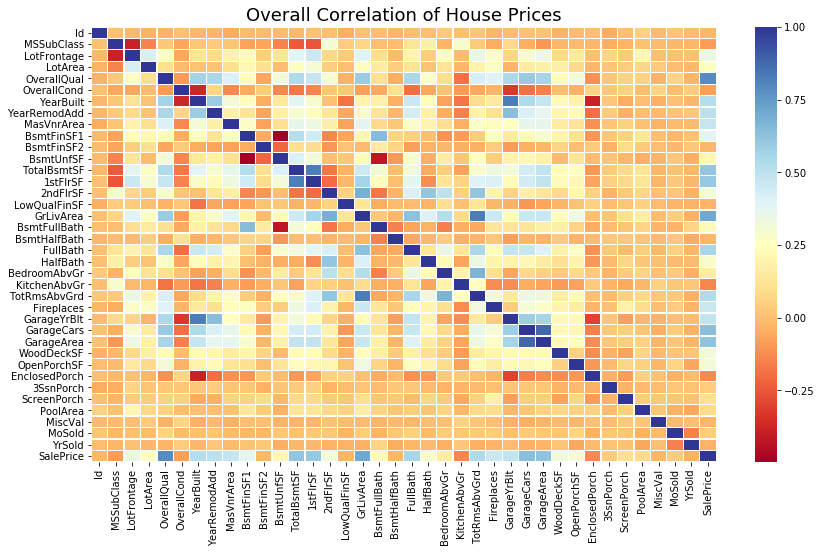

In [6]:
#Correlation matrix that is used to establish highly correlated features to House Prices
corr = train.corr()
plt.figure(figsize=(14,8))
plt.title('Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr,annot=False,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':20})
plt.show()

In [7]:
# Splitting the Variables into Different Categories

In [8]:
# Create the categories
outsidesurr_df = train[['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType', 'LotShape', 
                     'SaleCondition', 'SalePrice']]

building_df = train[['Id', 'MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition', 'SalePrice']]

utilities_df = train[['Id', 'Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal', 'MoSold',
                     'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

ratings_df = train[['Id', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                   'GarageCond', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

rooms_df = train[['Id', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
                 'SaleCondition', 'SalePrice']]




# Set Id as index of the dataframe.
outsidesurr_df = outsidesurr_df.set_index('Id')
building_df = building_df.set_index('Id')
utilities_df = utilities_df.set_index('Id')
ratings_df = ratings_df.set_index('Id')
rooms_df = rooms_df.set_index('Id')

# Move SalePrice to the first column (Our Label)
sp0 = outsidesurr_df['SalePrice']
outsidesurr_df.drop(labels=['SalePrice'], axis=1, inplace=True)
outsidesurr_df.insert(0, 'SalePrice', sp0)

sp1 = building_df['SalePrice']
building_df.drop(labels=['SalePrice'], axis=1, inplace=True)
building_df.insert(0, 'SalePrice', sp1)

sp2 = utilities_df['SalePrice']
utilities_df.drop(labels=['SalePrice'], axis=1, inplace=True)
utilities_df.insert(0, 'SalePrice', sp2)

sp3 = ratings_df['SalePrice']
ratings_df.drop(labels=['SalePrice'], axis=1, inplace=True)
ratings_df.insert(0, 'SalePrice', sp3)

sp4 = rooms_df['SalePrice']
rooms_df.drop(labels=['SalePrice'], axis=1, inplace=True)
rooms_df.insert(0, 'SalePrice', sp4)

In [9]:
# Gathering Insight of The Data

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



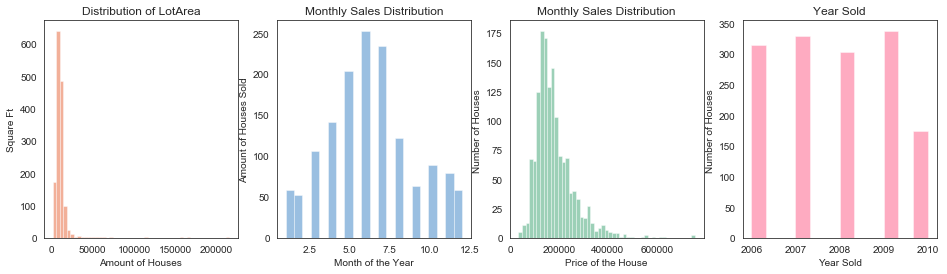

In [10]:
import seaborn as sns
sns.set_style('white')

f, axes = plt.subplots(ncols=4, figsize=(16,4))

# Lot Area: In Square Feet
sns.distplot(train['LotArea'], kde=False, color="#DF3A01", ax=axes[0]).set_title("Distribution of LotArea")
axes[0].set_ylabel("Square Ft")
axes[0].set_xlabel("Amount of Houses")

# MoSold: Year of the Month sold
sns.distplot(train['MoSold'], kde=False, color="#045FB4", ax=axes[1]).set_title("Monthly Sales Distribution")
axes[1].set_ylabel("Amount of Houses Sold")
axes[1].set_xlabel("Month of the Year")

# House Value
sns.distplot(train['SalePrice'], kde=False, color="#088A4B", ax=axes[2]).set_title("Monthly Sales Distribution")
axes[2].set_ylabel("Number of Houses ")
axes[2].set_xlabel("Price of the House")

# YrSold: Year the house was sold.
sns.distplot(train['YrSold'], kde=False, color="#FE2E64", ax=axes[3]).set_title("Year Sold")
axes[3].set_ylabel("Number of Houses ")
axes[3].set_xlabel("Year Sold")

plt.show()

In [11]:
# Right-Skewed Distribution

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



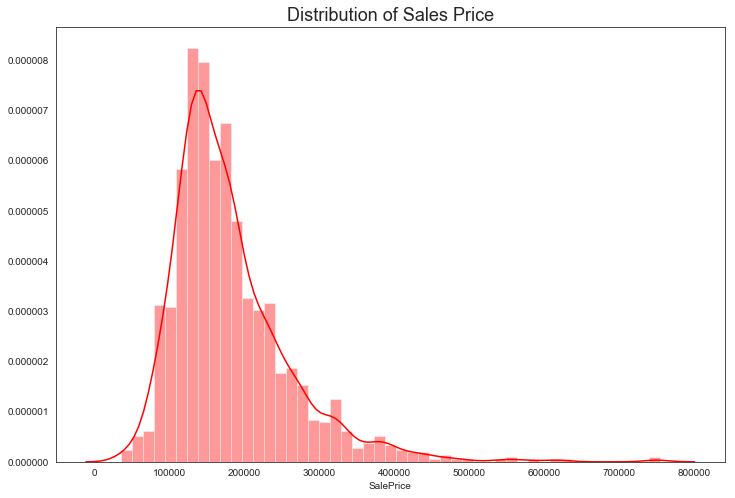

In [12]:
# This is done using plotly.
plt.figure(figsize=(12,8))
sns.distplot(train['SalePrice'], color='r')
plt.title('Distribution of Sales Price', fontsize=18)

plt.show()

In [13]:
# Level of Supply and Demand

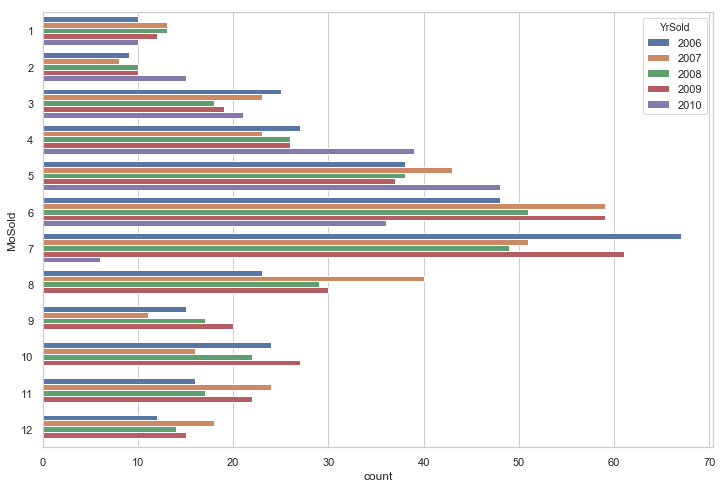

In [14]:
# It is conclusive that people tend to move during the summer (June and July)
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(y="MoSold", hue="YrSold", data=train)
plt.show()

Text(0.5,1,'Houses Sold per Year')

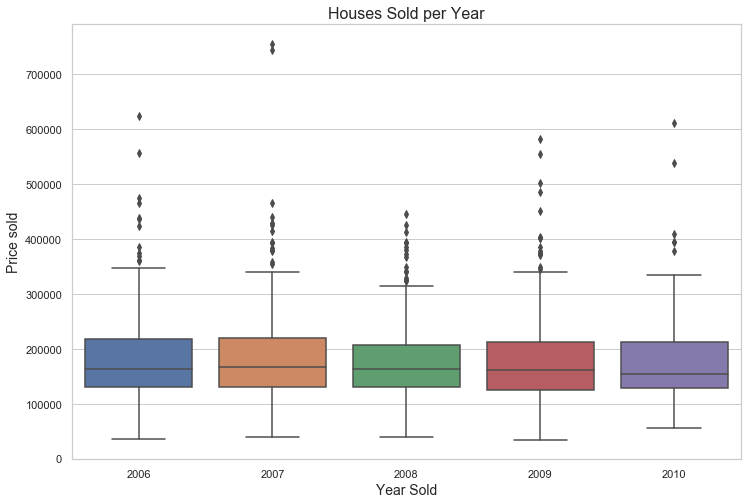

In [15]:
#Boxplot of Year Sold vs Price Sold
plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold', y='SalePrice', data=train)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

In [16]:
# Building Characteristics

In [17]:
building_df.head()

,SalePrice,MSSubClass,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,208500,60,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,Typ,Attchd,2003.0,RFn,2,548,2,2008,WD,Normal
2,181500,20,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,Typ,Attchd,1976.0,RFn,2,460,5,2007,WD,Normal
3,223500,60,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,Typ,Attchd,2001.0,RFn,2,608,9,2008,WD,Normal
4,140000,70,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,Typ,Detchd,1998.0,Unf,3,642,2,2006,WD,Abnorml
5,250000,60,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,Typ,Attchd,2000.0,RFn,3,836,12,2008,WD,Normal


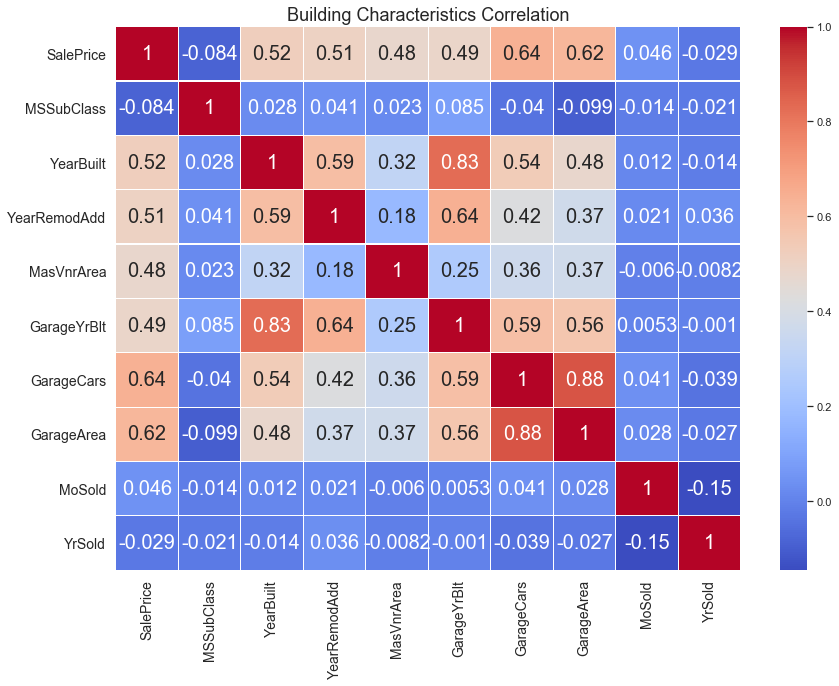

In [18]:
#Correlation matrix used to describe correlation between Sale Price and other Variables
corr = building_df.corr()

g = sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':20})
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 8)
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Building Characteristics Correlation", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
# From the heatmap above the High Correlated Variables with SalePrice are:
# 1) YearBuilt - The Date the building was built. 
# 2) YearRemodAdd - The last time there was building remodeling. 
# 3) MasVnArea - Masonry area.
# 4) GarageYrBlt - Year garage was built. 
# 5) GarageCars - Garage car capacity. 
# 6) GarageArea - Size of garage 

In [20]:
# To understand the data better a category column for SalePrice is created.
train['Price_Range'] = np.nan
lst = [train]

# Create a categorical variable for SalePrice
# This is for further visualizations.
for column in lst:
    column.loc[column['SalePrice'] < 150000, 'Price_Range'] = 'Low'
    column.loc[(column['SalePrice'] >= 150000) & (column['SalePrice'] <= 300000), 'Price_Range'] = 'Medium'
    column.loc[column['SalePrice'] > 300000, 'Price_Range'] = 'High'
    
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price_Range
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Medium


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



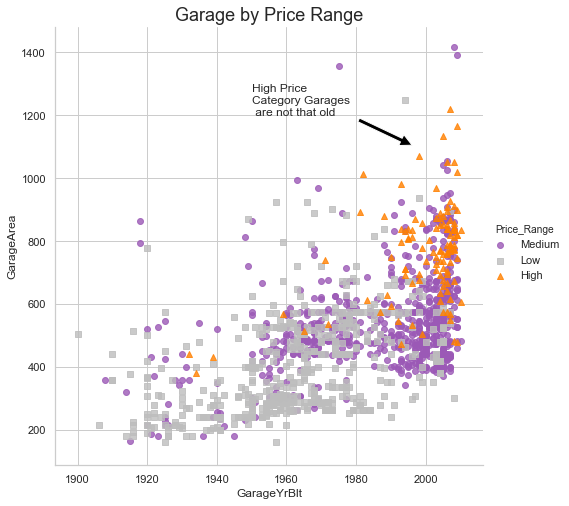

In [21]:
# Determining what garage tells us about the price category
import matplotlib.pyplot as plt
palette = ["#9b59b6", "#BDBDBD", "#FF8000"]
sns.lmplot('GarageYrBlt', 'GarageArea', data=train, hue='Price_Range', fit_reg=False, size=7, palette=palette,
          markers=["o", "s", "^"])
plt.title('Garage by Price Range', fontsize=18)
plt.annotate('High Price \nCategory Garages \n are not that old', xy=(1997, 1100), xytext=(1950, 1200), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

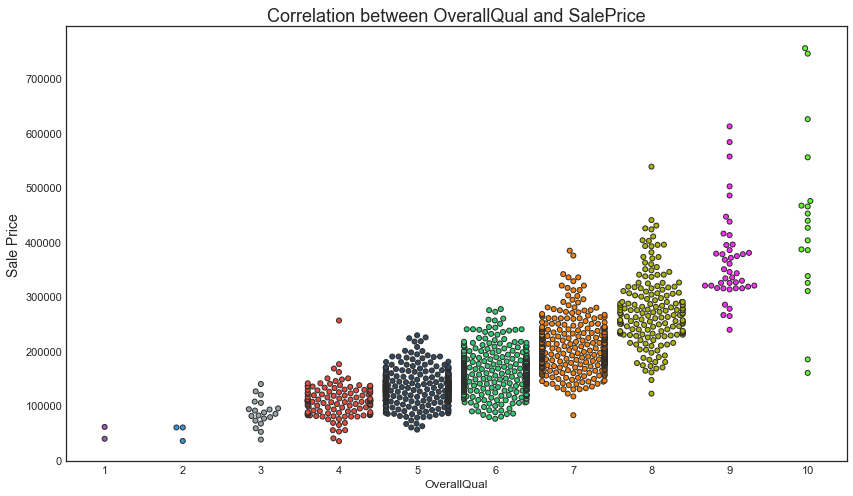

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(14,8))
palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#FF8000", "#AEB404", "#FE2EF7", "#64FE2E"]

sns.swarmplot(x="OverallQual", y="SalePrice", data=train, ax=ax, palette=palette, linewidth=1)
plt.title('Correlation between OverallQual and SalePrice', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

In [23]:
# Log Transformations which are used for: 
#     Reducing skewness of data
#     Easier to interpret patterns of our data.
#     Possible statistical analysis that require the data to be normalized.

In [24]:
numeric_features = train.dtypes[train.dtypes != "object"].index

# Top 5 most skewed features
skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(5)

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



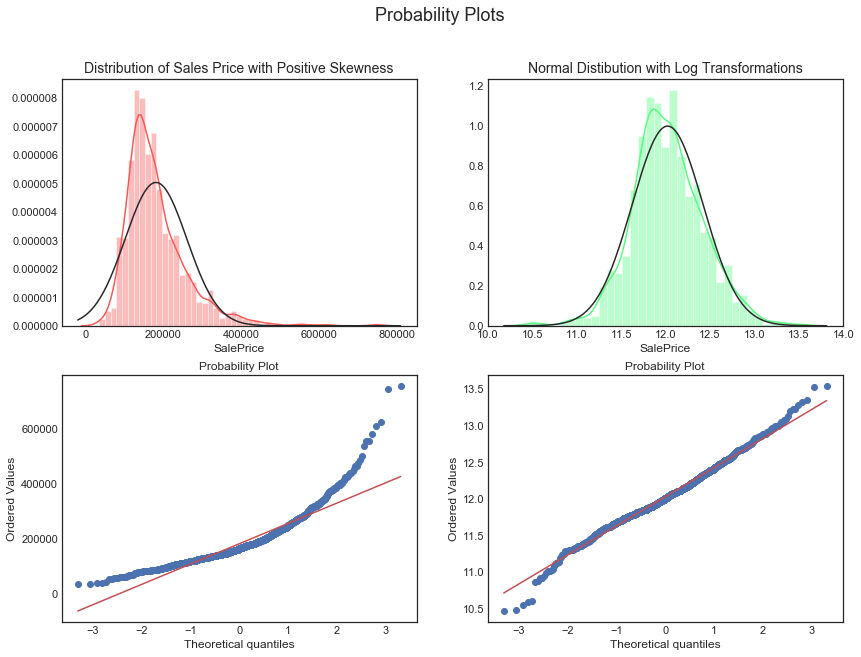

In [25]:
from scipy.stats import norm

# norm = a normal continous variable.

log_style = np.log(train['SalePrice'])  # log of salesprice

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(train['SalePrice'], color="#FA5858", ax=ax1, fit=norm)
ax1.set_title("Distribution of Sales Price with Positive Skewness", fontsize=14)
ax2 = sns.distplot(log_style, color="#58FA82",ax=ax2, fit=norm)
ax2.set_title("Normal Distibution with Log Transformations", fontsize=14)
ax3 = stats.probplot(train['SalePrice'], plot=ax3)
ax4 = stats.probplot(log_style, plot=ax4)

plt.show()

In [26]:
# Skewedness and Kurtosis

In [27]:
print('Skewness for Normal D.: %f'% train['SalePrice'].skew())
print('Skewness for Log D.: %f'% log_style.skew())
print('Kurtosis for Normal D.: %f' % train['SalePrice'].kurt())
print('Kurtosis for Log D.: %f' % log_style.kurt())

Skewness for Normal D.: 1.882876
Skewness for Log D.: 0.121335
Kurtosis for Normal D.: 6.536282
Kurtosis for Log D.: 0.809532


In [28]:
# Feature Engineering
# Dealing with the missing values

In [29]:
y_train = train['SalePrice'].values
# Concatenation is done before splitting
rtrain = train.shape[0]
ntest = test.shape[0]
train.drop(['SalePrice', 'Price_Range', 'Id'], axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [30]:
complete_data = pd.concat([train, test])
complete_data.shape

(2919, 79)

In [31]:
total_nas = complete_data.isnull().sum().sort_values(ascending=False)
percent_missing = (complete_data.isnull().sum()/complete_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_nas, percent_missing], axis=1, keys=['Total_M', 'Percentage'])


# missing.head(9) # There are 19 columns with NAs

In [32]:
#Transformation of missing values

In [33]:
complete_data["PoolQC"] = complete_data["PoolQC"].fillna("None")
complete_data["MiscFeature"] = complete_data["MiscFeature"].fillna("None")
complete_data["Alley"] = complete_data["Alley"].fillna("None")
complete_data["Fence"] = complete_data["Fence"].fillna("None")
complete_data["FireplaceQu"] = complete_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    complete_data[col] = complete_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    complete_data[col] = complete_data[col].fillna('None')
complete_data['MSZoning'] = complete_data['MSZoning'].fillna(complete_data['MSZoning'].mode()[0])
complete_data["MasVnrType"] = complete_data["MasVnrType"].fillna("None")
complete_data["Functional"] = complete_data["Functional"].fillna("Typ")
complete_data['Electrical'] = complete_data['Electrical'].fillna(complete_data['Electrical'].mode()[0])
complete_data['KitchenQual'] = complete_data['KitchenQual'].fillna(complete_data['KitchenQual'].mode()[0])
complete_data['Exterior1st'] = complete_data['Exterior1st'].fillna(complete_data['Exterior1st'].mode()[0])
complete_data['Exterior2nd'] = complete_data['Exterior2nd'].fillna(complete_data['Exterior2nd'].mode()[0])
complete_data['SaleType'] = complete_data['SaleType'].fillna(complete_data['SaleType'].mode()[0])
complete_data['MSSubClass'] = complete_data['MSSubClass'].fillna("None")

In [34]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
complete_data["LotFrontage"] = complete_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    complete_data[col] = complete_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    complete_data[col] = complete_data[col].fillna(0)
    
complete_data["MasVnrArea"] = complete_data["MasVnrArea"].fillna(0)

In [35]:
# Drop utilities
complete_data = complete_data.drop(['Utilities'], axis=1)

In [36]:
# Adding total footage feature 
complete_data['TotalSF'] = complete_data['TotalBsmtSF'] + complete_data['1stFlrSF'] + complete_data['2ndFlrSF']

In [37]:
#Transforming Numerical and Categorical Data

In [38]:
complete_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,2566.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,2524.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,2706.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,2473.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,3343.0


In [39]:
# Splitting categorical variables with numerical variables for encoding.
categorical = complete_data.select_dtypes(['object'])
numerical = complete_data.select_dtypes(exclude=['object'])

print(categorical.shape)
print(numerical.shape)

(2919, 42)
(2919, 37)


In [40]:
# Using Categorical Encoding Class
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
   
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
       
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [41]:
# Combining of Attributes
from sklearn.base import BaseEstimator, TransformerMixin

# class combination attribute.
# First finding out index possition of the other cloumns that make the attribute.
numerical.columns.get_loc("TotalBsmtSF") # Index Number 37
numerical.columns.get_loc("1stFlrSF") # Index NUmber 42
numerical.columns.get_loc("2ndFlrSF") # Index NUmber 43

ix_total, ix_first, ix_second = 9, 10, 11
# complete_data['TotalSF'] = complete_data['TotalBsmtSF'] + complete_data['1stFlrSF'] + complete_data['2ndFlrSF']

class CombineAttributes(BaseEstimator, TransformerMixin):
    
    def __init__(self, total_area=True): # No args or kargs
        self.total_area = total_area
        
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        total_sf = X[:,ix_total] + X[:,ix_first] + X[:,ix_second]
        if self.total_area:
            return np.c_[X, total_sf]
        else: 
            return np.c_[X]

attr_adder = CombineAttributes(total_area=True)
extra_attribs = attr_adder.transform(complete_data.values)

In [42]:
# Scikit-Learn does not handle dataframes in pipeline so we will create our own class.
# Reference: Hands-On Machine Learning
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or cateogrical columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [43]:
# Creating Pipelines to Scale Features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lst_numerical = list(numerical)

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(lst_numerical)),
    ('extra attributes', CombineAttributes()),
    ('std_scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
                                    'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle',
                                    'RoofMatl', 'Exterior1st',  'Exterior2nd','ExterQual','ExterCond', 'Foundation',
                                    'Heating','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                                    'PavedDrive', 'SaleType', 'SaleCondition'])),
    ('encoder', CategoricalEncoder(encoding="onehot-dense")),
])

In [44]:
# Combining pipelines
from sklearn.pipeline import FeatureUnion

main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numeric_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

data_prepared = main_pipeline.fit_transform(complete_data)
data_prepared

array([[ 0.06733141, -0.20935903, -0.21787869, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87361603,  0.48189993, -0.07204408, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06733141, -0.07110724,  0.13719688, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87361603,  4.16861441,  1.24680804, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65542357, -0.34761082,  0.0346054 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06733141,  0.20539635, -0.06862014, ...,  0.        ,
         1.        ,  0.        ]])

In [45]:
features = data_prepared
labels = np.log1p(y_train) # Scaling the Saleprice column.

train_scaled = features[:rtrain] 
test_scaled = features[rtrain:]

In [46]:
# Predictive Model Implementation


In [47]:
# Residual Plot Model
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [48]:
# This is data that comes from the training test.
X_train, X_val, y_train, y_val = train_test_split(train_scaled, labels, test_size=0.25, random_state=42)

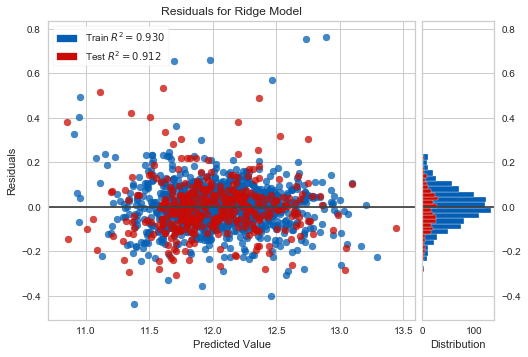

In [49]:
# Validation set tends to perform better. Less Residuals.
ridge = Ridge()
visualizer = ResidualsPlot(ridge, train_color='#045FB4', test_color='r', line_color='#424242')
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)
g = visualizer.poof(outpath="residual_plot")

In [50]:
#Validation function
n_folds = 5

def rmsle_cv(model, features, labels):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(features) # Shuffle the data.
    rmse= np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse.mean())

In [51]:
rid_reg = Ridge()
rid_reg.fit(X_train, y_train)
y_pred = rid_reg.predict(X_val)
rmsle_cv(rid_reg, X_val, y_val)

0.14580014316886447

In [52]:
# Random Forest Regressor
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': list(range(50, 200, 25)), 'max_features': ['auto', 'sqrt', 'log2'], 
         'min_samples_leaf': list(range(50, 200, 50))}

grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 75, 100, 125, 150, 175], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
# Show best parameters.
grid_search_cv.best_params_

{'max_features': 'auto', 'min_samples_leaf': 50, 'n_estimators': 75}

In [55]:

# RandomSearchCV only takees a sample not all possible combinations like GridSearchCV.
# Mean test score is equivalent to 0.2677
grid_search_cv.cv_results_
df_results = pd.DataFrame(grid_search_cv.cv_results_)
df_results.sort_values(by='mean_test_score', ascending=True).head(2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
53,0.285081,0.003998,0.022181,0.000712,log2,150,175,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.287446,0.271938,0.338126,0.299170,0.028264,54,0.29454,0.307650,0.332026,0.311405,0.015532
48,0.091084,0.002149,0.010848,0.001749,log2,150,50,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.314796,0.276814,0.326403,0.306004,0.021177,53,0.31712,0.315197,0.326068,0.319462,0.004737


In [56]:
rand_model = grid_search_cv.best_estimator_

rand_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
# Final root mean squared error.
y_pred = rand_model.predict(X_val)
rand_mse = mean_squared_error(y_val, y_pred)
rand_rmse = np.sqrt(rand_mse)
rand_rmse

0.18208289098440564

In [58]:
score = rmsle_cv(rand_model, X_val, y_val)
print("Random Forest score: {:.4f}\n".format(score))


Random Forest score: 0.2452



Text(0,0.5,'Feature Scores')

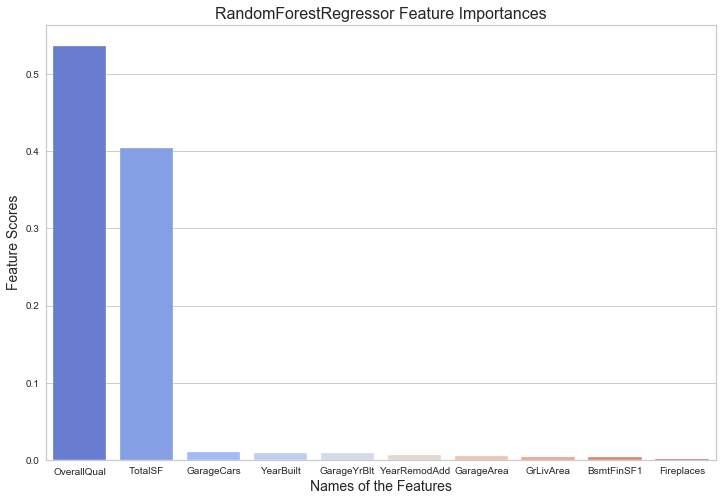

In [59]:
# Display scores next to attribute names.
# Reference Hands-On Machine Learning with Scikit Learn and Tensorflow
attributes = X_train
rand_results = rand_model.feature_importances_
cat_encoder = categorical_pipeline.named_steps["encoder"]
cat_features = list(cat_encoder.categories_[0])
total_features = lst_numerical + cat_features
feature_importance = sorted(zip(rand_results, total_features), reverse=True)
feature_arr = np.array(feature_importance)
# Top 10 features.
feature_scores = feature_arr[:,0][:10].astype(float)
feature_names = feature_arr[:,1][:10].astype(str)


d = {'feature_names': feature_names, 'feature_scores': feature_scores}
result_df = pd.DataFrame(data=d)

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='feature_names', y='feature_scores', data=result_df, palette="coolwarm")
plt.title('RandomForestRegressor Feature Importances', fontsize=16)
plt.xlabel('Names of the Features', fontsize=14)
plt.ylabel('Feature Scores', fontsize=14)

In [60]:
#GradientBoostingRegressor
params = {'learning_rate': [0.01], 'loss': ['ls'], 'max_depth': [3], 'max_features': ['log2'], 'min_samples_leaf': [1], 
          'min_samples_split': [2], 'n_estimators': [100]}


grad_boost = GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=3, 
                                       max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=100,
                                       random_state=0)


grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [61]:
y_pred = grad_boost.predict(X_val)
gboost_mse = mean_squared_error(y_val, y_pred)
gboost_rmse = np.sqrt(gboost_mse)
gboost_rmse

0.2846811211988215

In [62]:
# Gradient Boosting was considerable better than RandomForest Regressor.
# scale salesprice.
score = rmsle_cv(grad_boost, X_val, y_val)

In [63]:
print("Gradient Boosting score: {:.4f}\n".format(score))

Gradient Boosting score: 0.2752



In [64]:
#GradientBoostingRegressor with tweaked parameters
params = {'learning_rate': [0.05], 'loss': ['huber'], 'max_depth': [2], 'max_features': ['log2'], 'min_samples_leaf': [14], 
          'min_samples_split': [10], 'n_estimators': [3000]}


grad_boost = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=2, 
                                       max_features='log2', min_samples_leaf=14, min_samples_split=10, n_estimators=3000,
                                       random_state=42)


grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=14, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [65]:
#Accuracy of model improves considerably after paramter tweaks.
y_pred = grad_boost.predict(X_val)
gboost_mse = mean_squared_error(y_val, y_pred)
gboost_rmse = np.sqrt(gboost_mse)
gboost_rmse

0.12245585881513908

In [66]:
score = rmsle_cv(grad_boost, X_val, y_val)

In [67]:
print("Gradient Boosting new score: {:.4f}\n".format(score))

Gradient Boosting new score: 0.1403



In [68]:
# StackingRegressor
# Setting up the model
#Tuned parameters on the model results in same accuracy
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=3000)
svr = SVR(C=1, kernel='linear')
tree_reg = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2)
ridge_reg = Ridge(alpha=20)


In [69]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

lin_reg = LinearRegression()

ensemble_model = StackingRegressor(regressors=[elastic_net, svr, rand_model, grad_boost], meta_regressor=SVR(kernel="rbf"))

ensemble_model.fit(X_train, y_train)


score = rmsle_cv(ensemble_model, X_val, y_val)
print("Stacking Regressor score: {:.4f}\n".format(score))


Stacking Regressor score: 0.1444



In [70]:
final_pred = ensemble_model.predict(test_scaled)

In [71]:
# Persisting the stacking regressor
from sklearn.externals import joblib
joblib.dump(grad_boost, 'model.pkl')
print("Model dumped!")

Model dumped!


In [72]:
# Loading of the saved model
grad_boost_load = joblib.load('model.pkl')

In [73]:
# Check that the loaded model is the same as the original
assert grad_boost.score(X_train, y_train) == grad_boost_load.score(X_train, y_train)